Формат входного файла:</b></h1>


1) **Магнитометр** - (DATE TIME FIELD Lat Lon Alt), sep = ' '

                    Date - %D.%M.%Y.

   
3) **МВС** - (DATE TIME FIELD), sep = ' '

                    Date - %D.%M.%Y.


Медианное значение по вариациям (27.07.2022): 52 250 нТл

Нормальное магнитное поле To (27.07.2022): 52 390 нТл

                                            Граф обработки аэромагнитных данных БПЛА {G1000}:

1) Импорт файла *.txt с коптера+++
2) Коптер выполнял 5 измерений в секунду. Для сопоставления данных с магнитометра, нам требуется только одно измерение, поэтому
оставшиеся 4 измерения убираем с помощью фильтра в excel.+++
3) Переводим записанные коптером координаты с GPS из географической системы координат (WGS84) в проекционную (UTM zone 36N)+++
4) Убираем из данных первые N строк и последние N строк. Первые N строк - убираем до момента захода коптера на профиль.
Последние N строк - коптер завершил выполнение съёмки и возвращается на точку вылета.+++
5) Секущий профиль перемещаем на отдельный лист, оставляем только точки рядовых профилей. Он требуется для расчета точности работ.
6) Импортируем данные с магнитометра в лист с данными коптера (делим значение FIELD на 1000). Сопоставляем данные магнитометра по времени с коптером.+++
Частота записи магнитометра 1 Гц.+++
7) Создаем столбец с нормальным магнитным полем [To, нТл]. Оно постоянно (значение сверху), поэтому ячейку растягиваем вниз.+++
8) Расчитываем поправку за вариации [dT_var, нТл] по методике, которая была рассказана при обработке площадной магнитной съемки в Оксиньино.+++
9) Рассчитываем аномальное магнитное поле (АМП) [dTa, нТл].+++
10) Строим карту наблюденного АМП. Surfer->Grid Data->*xls. Метод гридирования Kriging. Карту оформляем в стандартной цветовой шкале: красный(-)-белый(0)-синий(+) с масштабной линейкой, подписью системы координат, цветовой шкалой, направлением на север.
Раздел карты Levels:
Contour interval - 1
Major contour every - 1
12) Расчет региональной компоненты АМП (фоновой составляющей). Региональная компонента представлена фоном с темкинской магнитной аномалии, которая
имеет линейный тренд. Региональные составляющие отвечают за глубинные источники (НЧ компоненту поля). Для её построения переходим в Surfer->Grid Data->*xls. Метод гридирования Polynomial Regression (1 порядка).
Данный метод применяет ко входным данным полином N степени. Выбрать его можно в разделе Advanced. Карту оформляем в стандартной цветовой шкале: красный(-)-белый(0)-синий(+) с масштабной линейкой, подписью системы координат, цветовой шкалой, направлением на север.
Раздел карты Levels:
Contour interval - 1
Major contour every - 1
13) Расчет локальной составляющей АМП. Локальная составляющая отвечает за распределение источников в верхней части разреза. Она вычисляется путем
вычета региональной компоненты АМП из наблюденного АМП. Surfer->Grids->Math. Выбираем сначала наблюденное АМП (А), потом региональную компоненту АМП (В). В формуле снизу вводим: А - В. Сохраняем файл и получаем локальную компоненту АМП. Карту оформляем в стандартной цветовой шкале: красный(-)-белый(0)-синий(+) с масштабной линейкой, подписью системы координат, цветовой шкалой, направлением на север.
Раздел карты Levels:
Contour interval - 1
Major contour every - 1
14) Локальная составляющая АМП имеет много шумов. Для их избавления следует немного подгладить карту с помощью:
Surfer->Grids->Filter->Low-pass Filter. Выбираем подходящий фильтр, так чтобы сглаживание было не сликом жестким.Карту оформляем в
стандартной цветовой шкале: красный(-)-белый(0)-синий(+) с масштабной линейкой, подписью системы координат, цветовой шкалой, направлением на север.
Раздел карты Levels:
Contour interval - 1
Major contour every - 1
16) Для отчета карты 1. Наблюденного АМП 2. Региональной компоненты АМП 3. Локальной составляющей АМП (до фильтрации) можно поместить на отдельный лист, без учета масштаба съёмки. Карту отфильтрованной локальной составляющей АМП делаем в масштабе съёмки с transform (1:1) на отдельном листе. Карту оформляем в стандартной цветовой шкале: красный(-)-белый(0)-синий(+) с масштабной линейкой, подписью системы координат, цветовой шкалой, направлением
на север.
Раздел карты Levels:
Contour interval - 1
Major contour every - 1
17) Расчет точности съёмки. Координаты с секущего прфоиля у нас есть на отдельном листе excel. Нам нужно снять данные с карты наблюденного АМП в точках
секущего профиля. Это делается с помощью функции:
Surfer->Grids->Point Sample
Выбираем грид наблюденного АМП и файл формата *bln.
Как делается этот файл:
-Создаем пустой файл *.txt и меняем вручную его формат на bln.
-Открываем
-1 строка: кол-во точек секущего профиля, 1 (например 1 строка будет выглядеть так: 357,1)
-Другие строки: копируем из excel координаты секущего профиля и вставляем их.
Заменяем табуляцию (выделяем её) на ,
Применяем функцию
Копируем данные наблюденного АМП рядовых точек из Surfer в excel (с 1 строки)
Считаем точность съёмки.
18) КФМ. Все выносим на топографическую карту 1. Вынести точки рядовой сети 2. Вынести все секущие профили 3. Вынести опорные профили (в отчете
их упомянуть, что по ним делается геофизическое уравнивание, но мы их не использовали). Точки сделать разным цветом (например рядовые красные, секущие синие, опорные - желтые). В легенде обязательно указать к какому типу точек относится цвет! Мы обрабатывали только часть съёмки, в связи с большим объемом иформации. Дополнительные файлы для КФМ находятся в папке КФМ. Это данные с коптера. Для него выполнить пункты обработки (1-4), всё объединить
и поместить на КФМ.

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import pyIGRF
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [11]:
def interpolate_variations(df):
    # Создаем новый DataFrame для интерполированных значений
    interpolated_df = pd.DataFrame()
    # Итерируем по строкам исходного DataFrame
    for i in range(len(df) - 1):
        date_1 = df.loc[i]['DATE']
        # Извлекаем значения вариаций из текущей и следующей строк
        var_1 = df.loc[i]['FIELD']
        var_6 = df.loc[i + 1]['FIELD']
        # Извлекаем значения времени из текущей и следующей строк
        t_1 = df.loc[i]['TIME']
        t_6 = df.loc[i + 1]['TIME']
        # Создаем временной ряд для интерполяции
        time_range = pd.date_range(start=t_1 + pd.Timedelta(seconds=1), end=t_6, freq='S')
        # Добавляем pd.Timedelta(seconds=1) к началу интервала, чтобы исключить первую секунду из интерполированных значений.
        # Интерполируем значения вариаций по линейной формуле
        interpolated_values = var_1 + (var_6 - var_1) * ((time_range - t_1).total_seconds() / ((t_6 - t_1).total_seconds()))
        # Добавляем интерполированные значения в новый DataFrame (Date был вставлен для сопоставления даты в случае длительных работ)
        interpolated_df = pd.concat([interpolated_df, pd.DataFrame({'DATE': date_1, 'TIME': time_range, 'FIELD': interpolated_values})])
    # Добавляем последнюю строку исходного DataFrame в новый DataFrame
    interpolated_df = pd.concat([interpolated_df, df.iloc[[-1]]])
    # Сбрасываем индексы
    interpolated_df = interpolated_df.reset_index(drop=True)
    return interpolated_df

In [12]:
# Загружаем данные с магнитовариационной станции
var_df = pd.read_csv('Var_Test.txt', sep=' ', skiprows=1, header=None, names=['DATE', 'TIME', 'FIELD'])
# Преобразуем столбец TIME в формат datetime
var_df['TIME'] = pd.to_datetime(var_df['TIME'], format='%H:%M:%S,%f')
# Удаляем миллисекунды из времени
var_df['TIME'] = var_df['TIME'].dt.floor('S')
# Преобразуем значения в столбце 'FIELD' в числовой формат
var_df['FIELD'] = pd.to_numeric(var_df['FIELD'])
# Делим значения магнитного поля на тысячу
var_df['FIELD'] = var_df['FIELD'] / 1000

In [13]:
# Загружаем данные с магнитометра
mag_df = pd.read_csv('Mag_Test.txt', sep=' ', skiprows=1, header=None, names=['DATE', 'TIME','FIELD', 'Lat', 'Lon', 'Alt'])
# Преобразуем столбец TIME в формат datetime
mag_df['TIME'] = pd.to_datetime(mag_df['TIME'], format='%H:%M:%S,%f')
# Удаляем миллисекунды из времени
mag_df['TIME'] = mag_df['TIME'].dt.floor('S')
# Преобразуем значения в столбце 'FIELD','Lat','Lon','Alt' в числовой формат
mag_df['FIELD'] = pd.to_numeric(mag_df['FIELD'])
mag_df['Lat'] = pd.to_numeric(mag_df['Lat'])
mag_df['Lon'] = pd.to_numeric(mag_df['Lon'])
mag_df['Alt'] = pd.to_numeric(mag_df['Alt'])
# Делим значения магнитного поля на тысячу
mag_df['FIELD'] = mag_df['FIELD'] / 1000
# Преобразуем дату в формат под IGRF
mag_df['DATE'] = pd.to_datetime(mag_df['DATE'], format='%d.%m.%Y')
mag_df['DATE'] = ((mag_df['DATE'].dt.day)/(366)) + (mag_df['DATE'].dt.month/12) + mag_df['DATE'].dt.year

In [14]:
### Интерполируем данные вариаций до 1-секундного периода (применяем функцию к массиву данных)
interpolated_var_df = interpolate_variations(var_df)
interpolated_var_df['TIME'] = pd.to_datetime(interpolated_var_df['TIME'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
interpolated_var_df['DATE'] = interpolated_var_df['DATE'].astype(str) #Преобразование типа
mag_df['TIME']=pd.to_datetime(mag_df['TIME'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

In [15]:
# Объединяем датафреймы
merged_df = pd.merge(mag_df, interpolated_var_df, on='TIME', how='left', suffixes=('_mag', '_var'))

In [16]:
# Преобразуем в float перед использованием pyIGRF.igrf_value
merged_df['DATE_mag'] = merged_df['DATE_mag'].astype(float)
merged_df['Lat'] = merged_df['Lat'].astype(float)
merged_df['Lon'] = merged_df['Lon'].astype(float)
merged_df['Alt'] = merged_df['Alt'].astype(float)

In [17]:
# Рассчитываем нормальное магнитное поле для каждой строки
merged_df['To, нТл'] = merged_df.apply(lambda row: pyIGRF.igrf_value(row['Lat'], row['Lon'], row['Alt'], row['DATE_mag']), axis=1)

In [18]:
# Преобразуем 'Normal_Field' в строковый тип перед использованием .str
merged_df['To, нТл'] = merged_df['To, нТл'].astype(str) 

In [19]:
# Разделяем столбец 'Normal_Field' на отдельные столбцы
merged_df['To, нТл'] = merged_df['To, нТл'].str.strip('()')
merged_df['To, нТл'] = merged_df['To, нТл'].str.split(',')
#Создаем столбец заполненный нулями, чтобы в него циклом поместить значения из столбца 'To, нТл'
merged_df['To_IGRF13, нТл'] = 0
for i in range(len(merged_df)):
    merged_df['To_IGRF13, нТл'][i] = merged_df['To, нТл'][i][6]
merged_df['To_IGRF13, нТл'] = merged_df['To_IGRF13, нТл'].astype(float)

In [18]:
# Удаляем лишние столбцы из базы данных
# merged_df = merged_df.drop(columns=['Тут вставить самим'])

In [20]:
Median_Level_str = input("Введите медианное значение по вариациям [нТл]: ")
try:
    Median_Level_float = float (Median_Level_str)
    print("Медианное значние по вариациям составляет:", Median_Level_float, " нТл")
except ValueError:
    print("Введите число")

Введите медианное значение по вариациям [нТл]:  52324.2545


Медианное значние по вариациям составляет: 52324.2545  нТл


In [ ]:
#Выполнить, если хотите постоянное значение нормального поля
T0_const_str = input("Введите постоянное значение нормального магнитного поля To [нТл]: ")
try:
    T0_const_float = float (T0_const_str)
    print("Нормальное поле для всех точек составляет:", T0_const_float, " нТл")
except ValueError:
    print("Введите нормальное число")
merged_df['To_const, нТл'] = T0_const_float

In [21]:
merged_df['dT_var, нТл'] = merged_df['FIELD_var'] - Median_Level_float
merged_df['dTa, нТл'] = merged_df['FIELD_mag'] - merged_df['dT_var, нТл'] - merged_df['To_IGRF13, нТл']

In [22]:
#Реализация пересчета вверх в частотной области
sig_spec = np.fft.fft(merged_df['dTa, нТл'])
n = len(merged_df)
dx = 10
filt=[]
h_per = input("Введите высоту пересчета в верхнее полупространство в км: ")
h_per = float (h_per)
dw = 2*np.pi/n/dx
for iw in range (int(n/2)):
    w = iw*dw
    filt.append(np.exp(-w*h_per)-0j)

for iw in range (int(n/2)):
    w = (n/2 - iw)*dw
    filt.append (np.conj (np.exp (-w * h_per)-0j))
   
w = np.linspace (0, 2*np.pi, n)

spec_out = sig_spec * filt

result = np.fft.ifft (spec_out)
result_real = [a.real for a in result]
merged_df['dTa_UP, нТл']=result_real

Введите высоту пересчета в верхнее полупространство в км:  5


In [23]:
# Сохраняем объединенный датафрейм в Excel
writer = pd.ExcelWriter('Mag_Var_Data.xlsx', engine='openpyxl')
interpolated_var_df.to_excel(writer, sheet_name='Variations', index=False)
merged_df.to_excel(writer, sheet_name='Magnetometer', index=False)
writer.book.save('Mag_Var_Data.xlsx')
print("Файл Excel с данными магнитометра и вариаций успешно создан: mag_var_data.xlsx")

Файл Excel с данными магнитометра и вариаций успешно создан: mag_var_data.xlsx


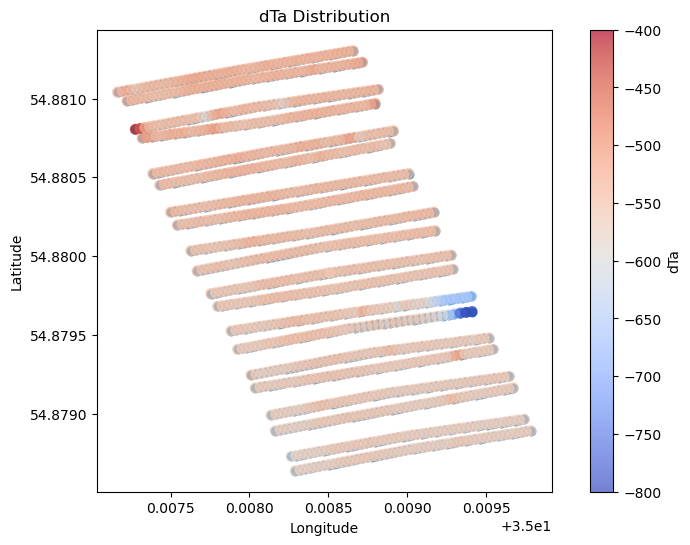

In [64]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

geometry = [Point(xy) for xy in zip(merged_df['Lon'], merged_df['Lat'])]
gdf = geopandas.GeoDataFrame(merged_df, geometry=geometry)

fig, ax = plt.subplots(1, 1, figsize=(10, 6)) # Создаем объект figure и ax
gdf.plot(ax=ax) # Наносим карту мира на ось ax

levels = np.linspace(merged_df['dTa, нТл'].min(), merged_df['dTa, нТл'].max(), 100)

scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['dTa, нТл'], cmap='coolwarm', s=50,  alpha=0.7, vmin = -800, vmax = -400)

#contour = ax.tricontour(gdf.geometry.x, gdf.geometry.y, gdf['dTa, нТл'], levels=levels, cmap='coolwarm', linewidths=1)

cbar = fig.colorbar(scatter, ax=ax, label='dTa')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('dTa Distribution')

plt.show()